# in this project we will be follow below sections
* Project understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment

##  1. Project Understanding
Understanding the factors that drive product sales is crucial for business owners aiming to maximize their revenue. This research aims to analyze product sales data using machine learning techniques to uncover patterns and develop recommendation models that can boost sales strategies.


## 2. Data Understanding

In [1]:
#import necessary libaries
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns

#### we obtain data from kaggle.com, dataset have two files one with Playstore details and the other with user rating

In [2]:
# uploading our datasets
playstore = pd.read_csv('../data/google_playstore/googleplaystore.csv')
user_rate = pd.read_csv('../data/google_playstore/googleplaystore_user_reviews.csv')

In [4]:
playstore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**we have seen columns for our dataset and bellow are the descriptions as per the auther**

* **App:** Application name
* **Category:** category the app is belonging to
* **Rating :** Overall user rating of the app
* **Reviews :** Number of user reviews for the app
* **Size:** Size of the app in megabytes (M)
* **Installs:** Number of user downloads/installs for the app
* **Type :** this indicate whether the app is paid or free
* **Price:** price the app
* **Content Rating :** Age group the app is targeted at - Children / Mature 21+ / Adult
* **Genres:** apart from its category app can have multiple genres
* **Last Updated:** last date the app was updated
* **Current Ver:** current app version

from the given data set we see the features are related to what we are trying to solve 

To recommend an app to user when downloading or viewing an app we need to consider the following features

* **Category**:  we will recommed app to user based on related category
* **Rating** : not only similar category, we will also recommend most Rated app, we can recommend top 5 reated one,
* **Review**: number of review implies the user interest to an app, so this is a feature to consider when recommending
* **Size**:  does not have direct impact on recommendation however most user prefer light apps due to storage issues
* number of **Installs** also add values to the app, its good to recommend most dowloaded/installed app
* most of user prefer **free** apps, if there is the best free apps, mosst of users can not bother downloading paid app
* low **priced** app usually creat more attention to user
* its better to recommend app of related to **age group**, this is ethically essential
* **updated date** has no direct impact on recommendations, if the app does well in market, however in some cases may be considered

### lets explore the other dataset 

In [4]:
user_rate.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [5]:
user_rate.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**we have seen columns for our dataset and bellow are the descriptions as per the auther**

* **App:** Application name this will act as an Identifier to link two files
* **Translated_Review:** these are user comented with english text
* **Sentiment :** is it positive,negative or neutral
* **Sentiment_Polarity :** numeric converted sentimental

#### lets explore important info from datasets

In [6]:
# shhowing info (shape ) of our datasets
playstore.shape, user_rate.shape

((10841, 13), (64295, 5))

In [7]:
# showing info for playstore datasets
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# shhowing info for user rate dataset
user_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### the Dataset need some cleaning and conversion so we will work on that on data preparation section

## 3. Data preparations

#### lets merge the two files to get collective dataset

In [9]:
combined_data = pd.merge(playstore, user_rate, on='App', how='inner')

In [10]:
combined_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


### let explore some important information from our combined dataset

In [11]:
combined_data.shape

(122662, 17)

In [12]:
### remove duplicates from the combined dataset
combined_data = combined_data.drop_duplicates()

In [13]:
combined_data.shape

(41661, 17)

In [14]:
### check for null values
combined_data.isnull().sum()

App                          0
Category                     0
Rating                      39
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         1247
Sentiment                 1239
Sentiment_Polarity        1239
Sentiment_Subjectivity    1239
dtype: int64

### our dataset contains some null values, we will first handle them accordingly 

* we will also handle convertion implisitly

In [16]:
## we will replace null values on rating with avarage fro similar category
combined_data['Rating'] = combined_data.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.mean())
)

In [18]:
## we will assume null senntimental as user did not rate so its neutral
combined_data['Sentiment_Polarity'] = combined_data['Sentiment_Polarity'].fillna(0)
combined_data['Sentiment'] = combined_data['Sentiment'].fillna('Neutral')

## we will convert "Review" to int also Install with some cleaning on Install feature
combined_data['Reviews']=combined_data['Reviews'].astype(int)
combined_data['Installs'] = combined_data['Installs'].replace({',': '', '\\+': ''}, regex=True).astype(int)

In [19]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41661 entries, 0 to 122622
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     41661 non-null  object 
 1   Category                41661 non-null  object 
 2   Rating                  41661 non-null  float64
 3   Reviews                 41661 non-null  int64  
 4   Size                    41661 non-null  object 
 5   Installs                41661 non-null  int64  
 6   Type                    41661 non-null  object 
 7   Price                   41661 non-null  object 
 8   Content Rating          41661 non-null  object 
 9   Genres                  41661 non-null  object 
 10  Last Updated            41661 non-null  object 
 11  Current Ver             41661 non-null  object 
 12  Android Ver             41661 non-null  object 
 13  Translated_Review       40414 non-null  object 
 14  Sentiment               41661 non-null  ob

In [20]:
combined_data.isnull().sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         1247
Sentiment                    0
Sentiment_Polarity           0
Sentiment_Subjectivity    1239
dtype: int64

#### lets drop some features that will not be used on our reserch as described bellow
* we will drop **Size** as will not be used on recommendation, "Type", "Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver","Translated_Review" we will use sentimental instead

In [21]:
sel_features = combined_data[['App', 'Category', 'Rating', 'Reviews', 'Installs','Sentiment', 'Sentiment_Polarity']]

In [22]:
sel_features.head(5)

,App,Category,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Negative,-0.250
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Negative,-0.725
2,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Neutral,0.000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Neutral,0.000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Positive,0.500


#### lets show important statistic information 

In [23]:
sel_features.describe()

,Rating,Reviews,Installs,Sentiment_Polarity
count,41661.000000,4.166100e+04,4.166100e+04,41661.000000
mean,4.323804,2.165843e+06,5.872639e+07,0.163333
std,0.286384,7.385055e+06,1.711760e+08,0.339463
min,2.500000,1.000000e+01,1.000000e+03,-1.000000
25%,4.200000,1.697300e+04,1.000000e+06,0.000000
50%,4.400000,1.087950e+05,1.000000e+07,0.125000
75%,4.500000,1.381820e+06,5.000000e+07,0.375000
max,4.900000,7.815831e+07,1.000000e+09,1.000000


* statistic info show some imbalannce of data especially on "Reviews" and "Installs" huge deviation from the mean value and big differennce btween max and min
* lets check for possible outliers

[Text(0.5, 1.0, 'Sentiment_Polarity')]

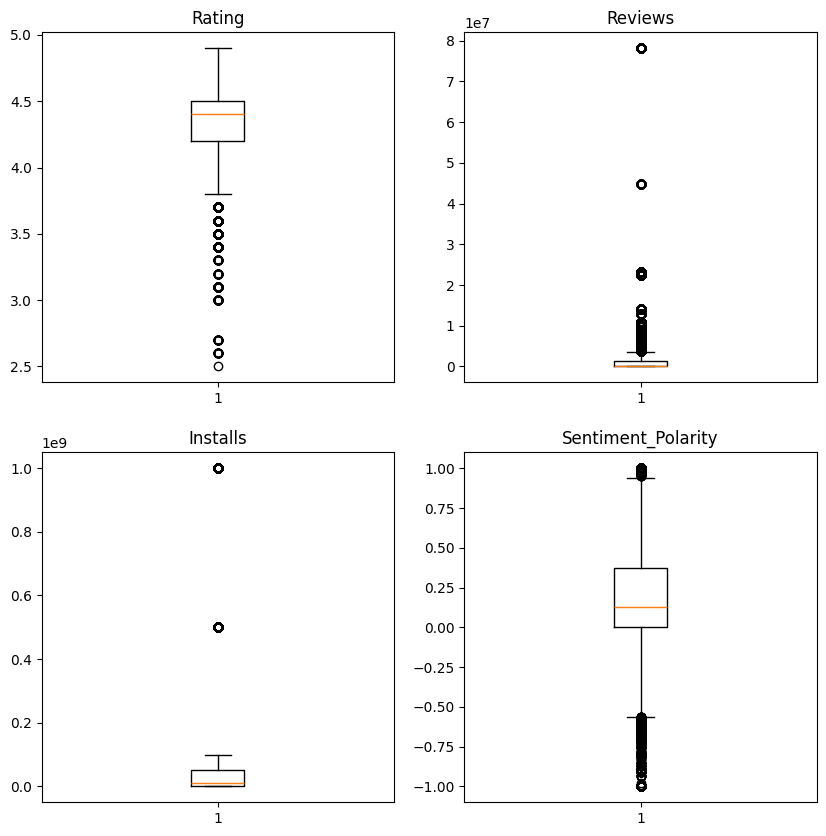

In [26]:
# firts option
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10));
ax1.boxplot(sel_features['Rating']);
ax1.set(title='Rating')

ax2.boxplot(sel_features['Reviews']);
ax2.set(title='Reviews')

ax3.boxplot(sel_features['Installs']);
ax3.set(title='Installs')

ax4.boxplot(sel_features['Sentiment_Polarity']);
ax4.set(title='Sentiment_Polarity')

#### visulisations shows outliers, lets work to handle them,
* for this reserach we will use quantile to replace them with equivalent boundaries accordingly

In [27]:
## lets creat supporting functon to handle that
def clip_outlier(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{feature}: Lower Bound={lower_bound}, Upper Bound={upper_bound}")

    
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df


In [28]:
## lets apply function for our feaatures
sel_features = sel_features.copy()  # Avoid modifying the original DataFrame

features_to_clip = ['Rating', 'Reviews', 'Installs', 'Sentiment_Polarity']

for feature in features_to_clip:
    sel_features = clip_outlier(sel_features, feature)


Rating: Lower Bound=3.7500000000000004, Upper Bound=4.949999999999999
Reviews: Lower Bound=-2030297.5, Upper Bound=3429090.5
Installs: Lower Bound=-72500000.0, Upper Bound=123500000.0
Sentiment_Polarity: Lower Bound=-0.5625, Upper Bound=0.9375


## Feature Insights

### Rating:
* Lower Bound: 3.75
* Upper Bound: 4.95
* Most apps fall within this range, with a narrow spread between bounds. Ratings generally skew high in app stores, so this makes sense. Apps below 3.75 or above 4.95 were considered outliers and clipped.

### Reviews:
* Lower Bound: -2,030,297.5
* Upper Bound: 3,429,090.5
* The negative lower bound is problematic because reviews can't be negative. This might indicate that the feature wasn't converted to numeric correctly or contains errors.

### Installs:
* Lower Bound: -72,500,000
* Upper Bound: 123,500,000
* The negative lower bound suggests an issue in data preprocessing since installs can't be negative. This could be due to incorrect encoding or normalization before calculating IQR.

### Sentiment Polarity:
* Lower Bound: -0.5625
* Upper Bound: 0.9375
* This range makes sense since sentiment polarity typically lies between -1 (negative) and 1 (positive). Outliers beyond this range were likely removed or clipped.


### lets see features distribution

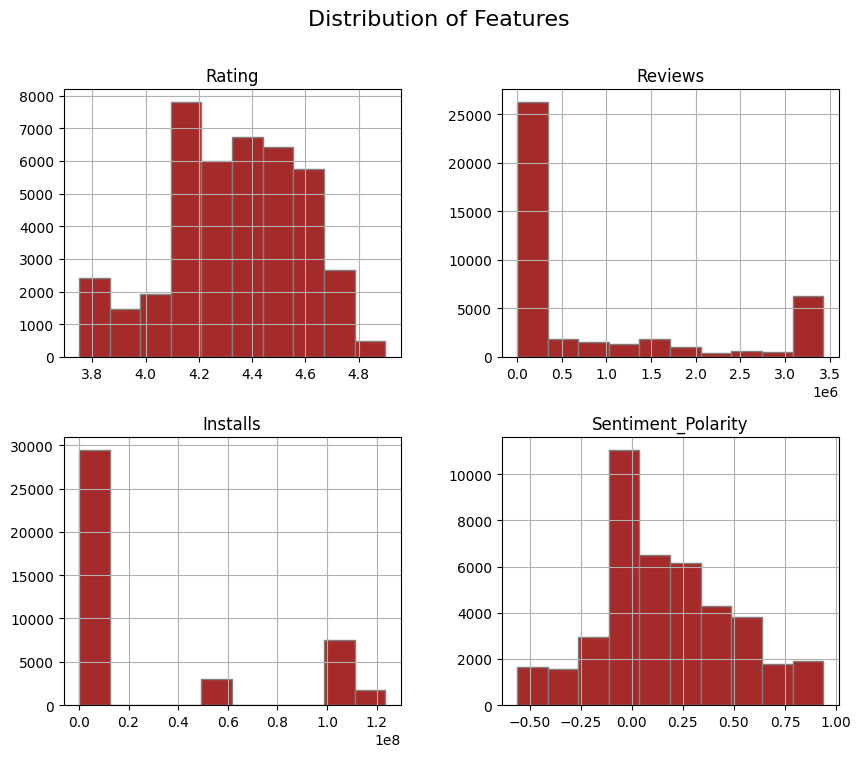

In [29]:
features = ['Rating', 'Reviews','Installs','Sentiment_Polarity']
sel_features[features].hist(bins=10, figsize=(10, 8), color='brown', edgecolor='gray')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

#### there are some skewness on Reviews and Installs. Lets try normalising them with np.log1p

In [30]:
sel_features['Reviews'] = np.log1p(sel_features['Reviews'])
sel_features['Installs'] = np.log1p(sel_features['Installs'])

#### lets show visulisation again to see distribution

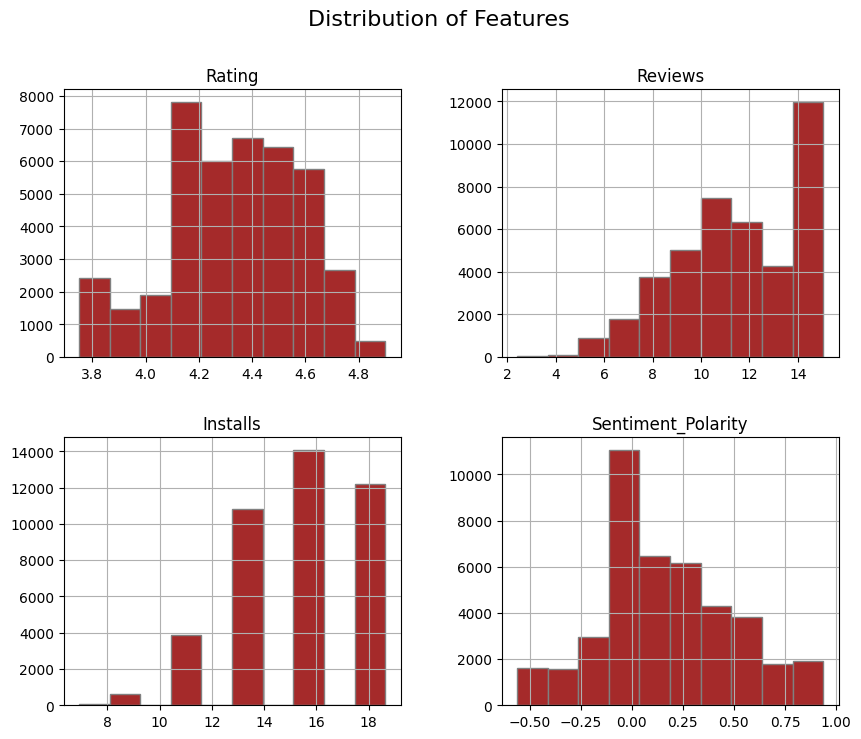

In [31]:
features = ['Rating', 'Reviews','Installs','Sentiment_Polarity']
sel_features[features].hist(bins=10, figsize=(10, 8), color='brown', edgecolor='gray')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

#### atleast we see some improvement, lets now apply outlier handling function again 

In [32]:
sel_features = sel_features.copy()  # Avoid modifying the original DataFrame

features_to_clip = ['Rating', 'Reviews', 'Installs', 'Sentiment_Polarity']

for feature in features_to_clip:
    sel_features = clip_outlier(sel_features, feature)

Rating: Lower Bound=3.7500000000000004, Upper Bound=4.949999999999999
Reviews: Lower Bound=3.1402259725894464, Upper Bound=20.738124820429917
Installs: Lower Bound=7.947478519820802, Upper Bound=23.595566621535394
Sentiment_Polarity: Lower Bound=-0.5625, Upper Bound=0.9375


#### we see some improvement now, lets visulise boxplot to see if outliers handles

[Text(0.5, 1.0, 'Sentiment_Polarity')]

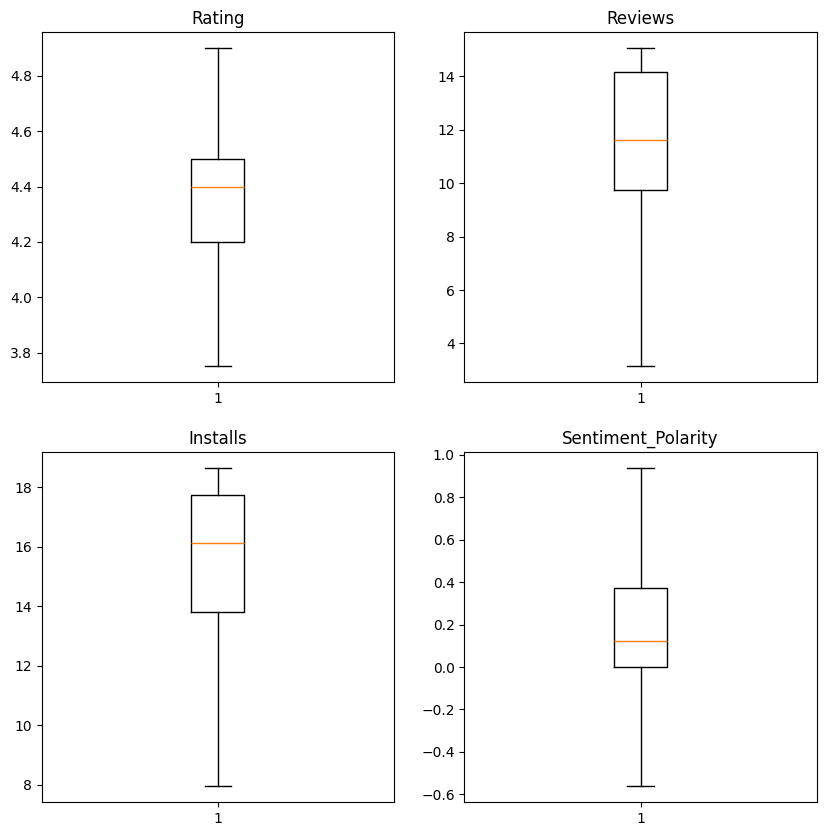

In [33]:
# firts option
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10));
ax1.boxplot(sel_features['Rating']);
ax1.set(title='Rating')

ax2.boxplot(sel_features['Reviews']);
ax2.set(title='Reviews')

ax3.boxplot(sel_features['Installs']);
ax3.set(title='Installs')

ax4.boxplot(sel_features['Sentiment_Polarity']);
ax4.set(title='Sentiment_Polarity')

#### looks much better now, lets explore some insights from the dataset

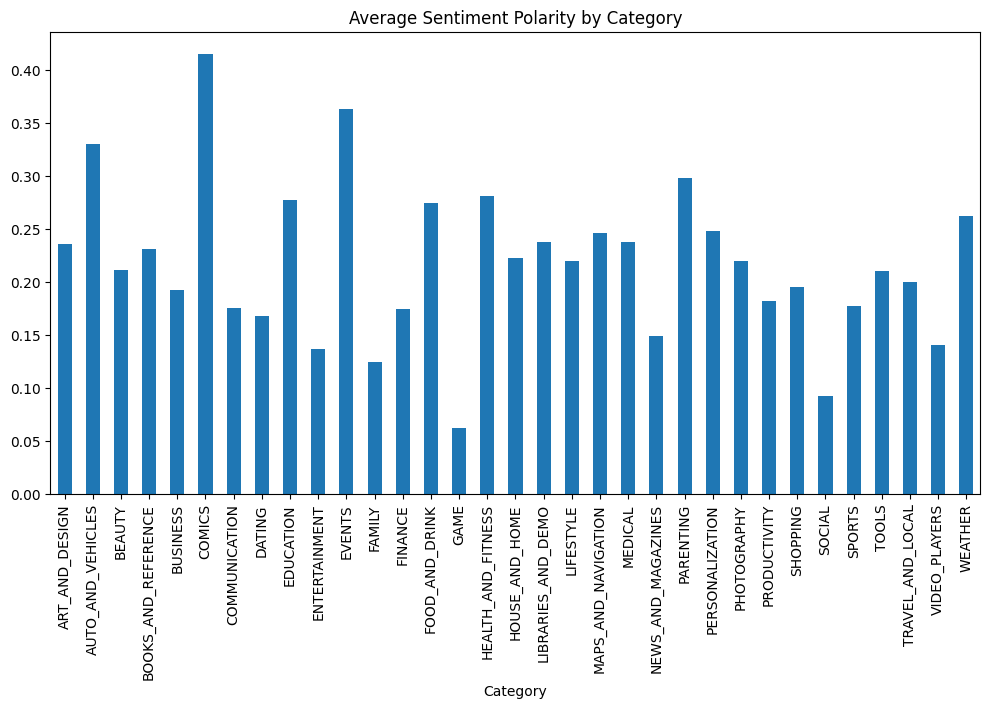

In [35]:
avg_sentiment_category = sel_features.groupby('Category')['Sentiment_Polarity'].mean()
avg_sentiment_category.plot(kind='bar', figsize=(12, 6), title='Average Sentiment Polarity by Category');

#### the graph shows users are more interacting with "COMICS" apps, followed by events, auto and vehicles,parenting, weather etc

### Now lets explore feature correlation 

In [36]:
# lets Perform one-hot encoding on 'Category'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sel_features['Category_Encoded'] = label_encoder.fit_transform(sel_features['Category'])

#### now lets visualise heatmap for our features

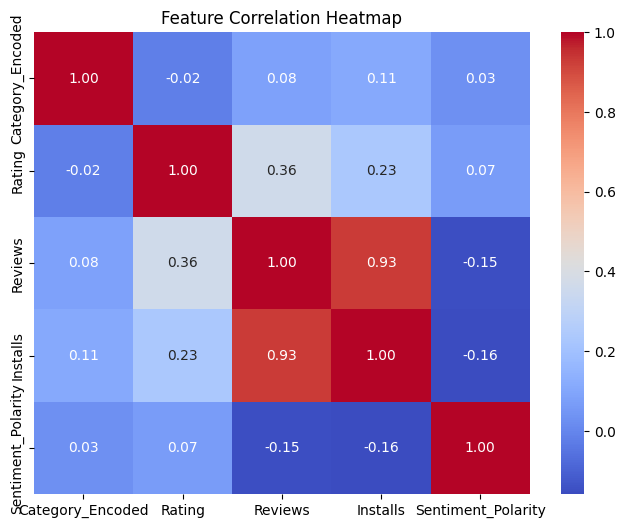

In [37]:
# Assuming your DataFrame is `df`
correlation_matrix = sel_features[['Category_Encoded','Rating', 'Reviews', 'Installs', 'Sentiment_Polarity']].corr()

# Visualizing correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## General insight 

* Strongest Relationship: The strongest correlation is between Reviews and Installs (0.93), which makes sense because more downloads often result in more reviews.
* Weak Relationships: The features Rating and Sentiment_Polarity do not have strong correlations with any other features, meaning they vary independently in this dataset.

now for our recommendation system we will be working with some features of more correlations, along with category as we will be recommending basing on app category

In [39]:
# we will use avarage as per the app and category
sel_features.groupby(['App','Category'])[['Rating','Reviews','Installs']].mean()

,,Rating,Reviews,Installs
App,Category,,,
10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365
11st,SHOPPING,3.8,10.794112,16.118096
1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512
1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096
...,...,...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,13.925614,17.727534
Hotstar,ENTERTAINMENT,4.3,15.047806,18.420681
Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,9.242227,13.815512


In [41]:
av_features= sel_features.groupby(['App','Category'])[['Rating','Reviews','Installs']].mean()

In [42]:
av_features = av_features.reset_index()

In [43]:
av_features

,App,Category,Rating,Reviews,Installs
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365
1,11st,SHOPPING,3.8,10.794112,16.118096
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096
...,...,...,...,...,...
1058,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,13.925614,17.727534
1059,Hotstar,ENTERTAINMENT,4.3,15.047806,18.420681
1060,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,9.242227,13.815512
1061,Housing-Real Estate & Property,LIFESTYLE,4.1,10.250688,13.815512


##  4. Modeling

#### in this project we will explore two models
* **SVD :** this is one of the best models from suprise packages built specific for recommendation systems
* **Clustering :** we will create cluster based on our selected features and recommend based on cluster/group

### lets start with SVD

In [44]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data for the surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(av_features[['App', 'Reviews', 'Rating']], reader)

In [45]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [46]:
# Use the SVD algorithm for recommendations
algo = SVD()
algo.fit(trainset)

In [47]:
# Make predictions
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.2479


0.24787905552308065

In [48]:
# convert categorical data to numeric
av_features_catbrk = pd.get_dummies(av_features, columns=['Category'], drop_first=False)

In [49]:
av_features_catbrk.head(3)

,App,Rating,Reviews,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,10 Best Foods for You,4.0,7.820440,13.122365,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11st,3.8,10.794112,16.118096,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1800 Contacts - Lens Store,4.7,10.050225,13.815512,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
# lets start our mode with content-based filtering
from sklearn.metrics.pairwise import cosine_similarity

features = ['Rating', 'Reviews','Installs'] + list(av_features_catbrk.columns[av_features_catbrk.columns.str.contains('Category_')])
similarity_matrix = cosine_similarity(av_features_catbrk[features])

In [51]:
def recommend_apps(app, similarity_matrix, playstore, num_recoms=10):
    app_index = av_features_catbrk[av_features_catbrk['App'] == app].index[0]
    similar_indices = similarity_matrix[app_index].argsort()[::-1][1:num_recoms+1]
    #return av_features_catbrk.iloc[similar_indices][['App','Rating','Reviews']]
    return av_features_catbrk.sort_values(by='Rating', ascending=False).head(num_recoms)

In [52]:
recomms = recommend_apps("Coloring book moana", similarity_matrix, av_features_catbrk, num_recoms=10)[['App','Rating','Reviews']]

In [53]:
recomms

,App,Rating,Reviews
693,FREE LIVE TALK,4.9,6.655440
582,Down Dog: Great Yoga Anywhere,4.9,10.273187
314,CDL Practice Test 2018 Edition,4.9,8.958669
524,DMV Permit Practice Test 2018 Edition,4.9,8.714568
912,GoodRx Drug Prices and Coupons,4.8,10.987984
529,"DU Recorder – Screen Recorder, Video Editor, Live",4.8,14.766678
667,"Even - organize your money, get paid early",4.8,9.417761
751,Find a Way: Addictive Puzzle,4.8,10.583575
1038,Home Workout - No Equipment,4.8,12.971899
1039,Home Workout for Men - Bodybuilding,4.8,9.449830


In [54]:
recomms.merge(av_features[['App', 'Category']], on='App', how='left')

,App,Rating,Reviews,Category
0,FREE LIVE TALK,4.9,6.655440,DATING
1,Down Dog: Great Yoga Anywhere,4.9,10.273187,HEALTH_AND_FITNESS
2,CDL Practice Test 2018 Edition,4.9,8.958669,AUTO_AND_VEHICLES
3,DMV Permit Practice Test 2018 Edition,4.9,8.714568,AUTO_AND_VEHICLES
4,GoodRx Drug Prices and Coupons,4.8,10.987984,MEDICAL
5,"DU Recorder – Screen Recorder, Video Editor, Live",4.8,14.766678,VIDEO_PLAYERS
6,"Even - organize your money, get paid early",4.8,9.417761,FINANCE
7,Find a Way: Addictive Puzzle,4.8,10.583575,FAMILY
8,Home Workout - No Equipment,4.8,12.971899,HEALTH_AND_FITNESS
9,Home Workout for Men - Bodybuilding,4.8,9.449830,HEALTH_AND_FITNESS


### Lets Explore clustering models

In [55]:
for_clustering = av_features

In [56]:
for_clustering

,App,Category,Rating,Reviews,Installs
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365
1,11st,SHOPPING,3.8,10.794112,16.118096
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096
...,...,...,...,...,...
1058,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,13.925614,17.727534
1059,Hotstar,ENTERTAINMENT,4.3,15.047806,18.420681
1060,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,9.242227,13.815512
1061,Housing-Real Estate & Property,LIFESTYLE,4.1,10.250688,13.815512


In [58]:
from sklearn.cluster import KMeans

# Fit a K-Means model on the normalized data
kmeans = KMeans(n_clusters=5, random_state=42)
for_clustering['Cluster'] = kmeans.fit_predict(for_clustering[['Reviews', 'Rating', 'Installs']])

In [59]:
for_clustering.head(10)

,App,Category,Rating,Reviews,Installs,Cluster
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365,0
1,11st,SHOPPING,3.8,10.794112,16.118096,4
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512,0
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096,3
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096,3
5,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,9.350711,11.512935,0
6,"2Date Dating App, Love and matching",DATING,4.4,10.636000,13.122365,0
7,2GIS: directory & navigator,TRAVEL_AND_LOCAL,4.5,13.552630,17.727534,2
8,2RedBeans,DATING,4.0,5.823046,9.210440,1
9,2ndLine - Second Phone Number,COMMUNICATION,4.2,9.672879,13.815512,0


In [60]:
# Recommend apps within the same cluster
def recommend_from_cluster(app_name, data, top_n=5):
    app_cluster = data[data['App'] == app_name]['Cluster'].values[0]
    cluster_apps = data[data['Cluster'] == app_cluster]
    return cluster_apps.head(top_n)

recommendations = recommend_from_cluster("21-Day Meditation Experience", for_clustering)
print(recommendations)

                                   App            Category  Rating    Reviews  \
0                10 Best Foods for You  HEALTH_AND_FITNESS     4.0   7.820440   
2           1800 Contacts - Lens Store             MEDICAL     4.7  10.050225   
5         21-Day Meditation Experience  HEALTH_AND_FITNESS     4.4   9.350711   
6  2Date Dating App, Love and matching              DATING     4.4  10.636000   
9        2ndLine - Second Phone Number       COMMUNICATION     4.2   9.672879   

    Installs  Cluster  
0  13.122365        0  
2  13.815512        0  
5  11.512935        0  
6  13.122365        0  
9  13.815512        0  


#### the Recommendation does not seem to work fine as we expected recommendation based on categories 

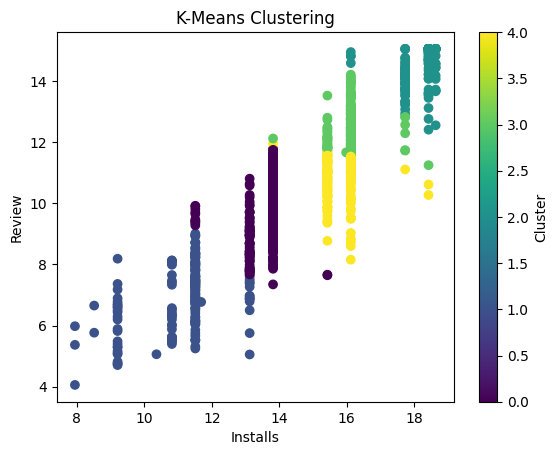

In [61]:
import matplotlib.pyplot as plt

plt.scatter(for_clustering['Installs'], for_clustering['Reviews'], c=for_clustering['Cluster'], cmap='viridis')
plt.xlabel("Installs")
plt.ylabel("Review")
plt.title("K-Means Clustering")
plt.colorbar(label='Cluster')
plt.show()

In [63]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(for_clustering[['Reviews', 'Rating', 'Installs']], for_clustering['Cluster'])
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.47181400366063336


#### now lets try to compasate "Category" during clustering

In [65]:
cat_cluster = av_features

In [66]:
# lets Perform one-hot encoding on 'Category'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cat_cluster['Category_Encoded'] = label_encoder.fit_transform(cat_cluster['Category'])


In [67]:
cat_cluster.head(5)

,App,Category,Rating,Reviews,Installs,Cluster,Category_Encoded
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365,0,15
1,11st,SHOPPING,3.8,10.794112,16.118096,4,26
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512,0,20
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096,3,14
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096,3,23


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(cat_cluster[['Rating', 'Reviews', 'Installs']])

# Combine scaled numerical features with encoded categories
if 'Category_Encoded' in cat_cluster:
    cluster_data = pd.concat([pd.DataFrame(scaled_features, columns=['Rating', 'Reviews', 'Installs']),
                              cat_cluster['Category_Encoded']], axis=1)
else:
    cluster_data = pd.concat([pd.DataFrame(scaled_features, columns=['Rating', 'Reviews', 'Installs']),
                              category_encoded], axis=1)


In [69]:
cat_cluster

,App,Category,Rating,Reviews,Installs,Cluster,Category_Encoded
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365,0,15
1,11st,SHOPPING,3.8,10.794112,16.118096,4,26
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512,0,20
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096,3,14
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096,3,23
...,...,...,...,...,...,...,...
1058,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,13.925614,17.727534,2,29
1059,Hotstar,ENTERTAINMENT,4.3,15.047806,18.420681,2,9
1060,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,9.242227,13.815512,0,30
1061,Housing-Real Estate & Property,LIFESTYLE,4.1,10.250688,13.815512,0,18


In [70]:
# Fit K-Means with the updated features
kmeans = KMeans(n_clusters=5, random_state=42)
cat_cluster['Cluster'] = kmeans.fit_predict(cluster_data)

In [71]:
# Check category distribution within each cluster
for cluster in cat_cluster['Cluster'].unique():
    cluster_apps = cat_cluster[cat_cluster['Cluster'] == cluster]
    top_categories = cluster_apps['Category'].value_counts().head(3)
    print(f"Cluster {cluster} - Top Categories:\n{top_categories}\n")


Cluster 0 - Top Categories:
Category
GAME                  105
HEALTH_AND_FITNESS     47
FOOD_AND_DRINK         20
Name: count, dtype: int64

Cluster 1 - Top Categories:
Category
TOOLS               54
TRAVEL_AND_LOCAL    46
PRODUCTIVITY        46
Name: count, dtype: int64

Cluster 3 - Top Categories:
Category
MEDICAL            47
PERSONALIZATION    44
PHOTOGRAPHY        43
Name: count, dtype: int64

Cluster 2 - Top Categories:
Category
DATING           48
COMMUNICATION    42
EDUCATION        31
Name: count, dtype: int64

Cluster 4 - Top Categories:
Category
FAMILY           112
FINANCE           46
ENTERTAINMENT     33
Name: count, dtype: int64



In [72]:
# lets improve our recommendation funnction 
def recommend_from_cluster(app_name, data, top_n=10):
    app_cluster = data[data['App'] == app_name]['Cluster'].values[0]
    app_category = data[data['App'] == app_name]['Category'].values[0]
    
    # Filter by cluster and category
    cluster_apps = data[(data['Cluster'] == app_cluster) & (data['Category'] == app_category)]
    return cluster_apps.sort_values(by='Rating', ascending=False).head(top_n)


In [73]:
recommendations = recommend_from_cluster("Coloring book moana", cat_cluster)
print(recommendations[['App', 'Category', 'Rating', 'Cluster']])

                                                   App        Category  \
376  Canva: Poster, banner, card maker & graphic de...  ART_AND_DESIGN   
458                      Colorfit - Drawing & Coloring  ART_AND_DESIGN   
128                          Anime Manga Coloring Book  ART_AND_DESIGN   
13     3D Color Pixel by Number - Sandbox Art Coloring  ART_AND_DESIGN   
869                               Garden Coloring Book  ART_AND_DESIGN   
768                      FlipaClip - Cartoon animation  ART_AND_DESIGN   
593                      Drawing Clothes Fashion Ideas  ART_AND_DESIGN   
625                                 Easy Origami Ideas  ART_AND_DESIGN   
126                              Animated Photo Editor  ART_AND_DESIGN   
277          Boys Photo Editor - Six Pack & Men's Suit  ART_AND_DESIGN   

     Rating  Cluster  
376     4.7        2  
458     4.7        2  
128     4.5        2  
13      4.4        2  
869     4.4        2  
768     4.3        2  
593     4.2        2  
6

In [74]:
## scaaled feature dataset
scaled_ft= pd.DataFrame(scaled_features, columns=['Rating', 'Reviews', 'Installs'])

In [75]:
scaled_ft

,Rating,Reviews,Installs
0,0.217391,0.342211,0.484346
1,0.043478,0.612856,0.764733
2,0.826087,0.545152,0.549222
3,0.739130,0.747894,0.764733
4,0.391304,0.691608,0.764733
...,...,...,...
1058,0.391304,0.897865,0.915369
1059,0.478261,1.000000,0.980245
1060,0.478261,0.471613,0.549222
1061,0.304348,0.563397,0.549222


In [76]:
scaled_domain = pd.concat([pd.DataFrame(scaled_features, columns=['Rating', 'Reviews', 'Installs']),
                              cat_cluster['Cluster']], axis=1)

In [77]:
scaled_domain.head(3)

,Rating,Reviews,Installs,Cluster
0,0.217391,0.342211,0.484346,0
1,0.043478,0.612856,0.764733,1
2,0.826087,0.545152,0.549222,3


In [78]:
# Calculate silhouette score
score = silhouette_score(cluster_data, cat_cluster['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.56


In [81]:
av_features

,App,Category,Rating,Reviews,Installs,Cluster,Category_Encoded
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365,0,15
1,11st,SHOPPING,3.8,10.794112,16.118096,1,26
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512,3,20
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096,0,14
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096,3,23
...,...,...,...,...,...,...,...
1058,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,13.925614,17.727534,1,29
1059,Hotstar,ENTERTAINMENT,4.3,15.047806,18.420681,4,9
1060,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,9.242227,13.815512,1,30
1061,Housing-Real Estate & Property,LIFESTYLE,4.1,10.250688,13.815512,3,18


In [82]:
#### Letst explore recommendation with TrancatedSVD with cosign similaarities
trnc_svd = av_features.drop(['Cluster','Category_Encoded'],axis=1)

In [83]:
trnc_svd

,App,Category,Rating,Reviews,Installs
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,7.820440,13.122365
1,11st,SHOPPING,3.8,10.794112,16.118096
2,1800 Contacts - Lens Store,MEDICAL,4.7,10.050225,13.815512
3,1LINE – One Line with One Touch,GAME,4.6,12.277830,16.118096
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,11.659395,16.118096
...,...,...,...,...,...
1058,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,13.925614,17.727534
1059,Hotstar,ENTERTAINMENT,4.3,15.047806,18.420681
1060,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,9.242227,13.815512
1061,Housing-Real Estate & Property,LIFESTYLE,4.1,10.250688,13.815512


In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# One-hot encode the 'Category'
category_encoded = pd.get_dummies(trnc_svd['Category'], prefix='Category')

# Normalize numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(trnc_svd[['Rating', 'Reviews', 'Installs']])

# Combine numerical features with one-hot encoded category
features = pd.concat(
    [pd.DataFrame(numerical_features, columns=['Rating', 'Reviews', 'Installs']), category_encoded],
    axis=1
)


In [85]:
# Apply SVD
svd = TruncatedSVD(n_components=30, random_state=42)  # Reduce to 50 components
reduced_features = svd.fit_transform(features)


In [86]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(reduced_features)
similarity_df = pd.DataFrame(similarity_matrix, index=trnc_svd['App'], columns=trnc_svd['App'])


In [87]:
def recommend_apps(app_name, similarity_df, top_n=10):
    if app_name not in similarity_df.index:
        return "App not found in the dataset."
    
    # Get similarity scores for the app
    similarity_scores = similarity_df.loc[app_name].sort_values(ascending=False)
    
    # Exclude the app itself and return top_n similar apps
    recommendations = similarity_scores.iloc[1:top_n+1].index
    recommendations = trnc_svd[trnc_svd['App'].isin(recommendations)][['App', 'Category', 'Rating']]
    return recommendations


In [88]:
#with no top rated
recommend_apps('11st', similarity_df, top_n=10)

,App,Category,Rating
56,"AT&T Navigator: Maps, Traffic",TRAVEL_AND_LOCAL,3.75
109,Amazon for Tablets,SHOPPING,4.00
158,BBC Media Player,ENTERTAINMENT,3.75
215,Beauty Camera - Selfie Camera,BEAUTY,4.00
276,Boxed Wholesale,SHOPPING,3.80
408,Checkout 51: Grocery coupons,SHOPPING,4.10
419,Chilindo,SHOPPING,3.80
859,GS SHOP,SHOPPING,3.80
958,H&M,LIFESTYLE,3.75
989,HTC Weather,WEATHER,3.90


In [89]:
def recommend_apps2(app_name, similarity_df, original_df, top_n=10):
    if app_name not in similarity_df.index:
        return "App not found in the dataset."
    
    # Get similarity scores for the app
    similarity_scores = similarity_df.loc[app_name].sort_values(ascending=False)
    
    # Exclude the app itself and get similar apps
    recommended_apps = similarity_scores.iloc[1:].index  # Get all similar apps except the app itself
    
    # Fetch details from the original dataset
    recommendations = original_df[original_df['App'].isin(recommended_apps)][['App', 'Category', 'Rating']]
    
    # Sort recommendations by Rating in descending order and get the top_n
    top_recommendations = recommendations.sort_values(by='Rating', ascending=False).head(top_n)
    
    return top_recommendations


In [90]:
recommend_apps2('Hotstar', similarity_df, trnc_svd, top_n=10)

,App,Category,Rating
693,FREE LIVE TALK,DATING,4.9
582,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9
524,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
314,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
852,GPS Speedometer and Odometer,MAPS_AND_NAVIGATION,4.8
468,CompTIA Exam Training,FAMILY,4.8
112,Amino: Communities and Chats,SOCIAL,4.8
529,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8
442,Classical music for baby,PARENTING,4.8
650,English Grammar Test,EDUCATION,4.8


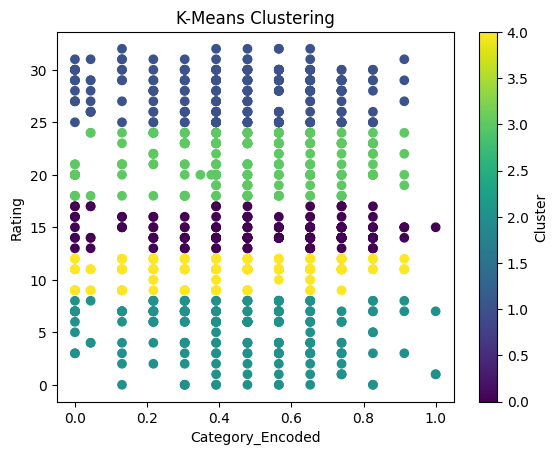

In [91]:
plt.scatter(scaled_ft['Rating'], cat_cluster['Category_Encoded'], 
            c=cat_cluster['Cluster'], cmap='viridis')
plt.xlabel("Category_Encoded")
plt.ylabel("Rating")
plt.title("K-Means Clustering")
plt.colorbar(label='Cluster')
plt.show()

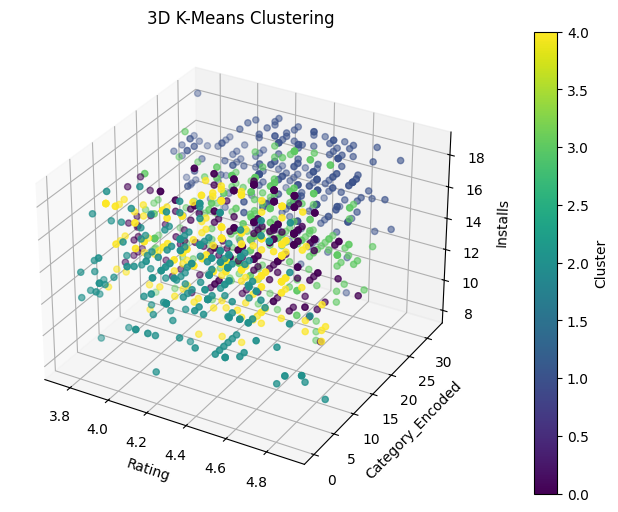

In [92]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
scatter = ax.scatter(
    cat_cluster['Rating'],
    cat_cluster['Category_Encoded'],
    cat_cluster['Installs'],
    c=cat_cluster['Cluster'],
    cmap='viridis'
)

# Adding labels and title
ax.set_xlabel("Rating")
ax.set_ylabel("Category_Encoded")
ax.set_zlabel("Installs")
ax.set_title("3D K-Means Clustering")

# Adding colorbar for clusters
cb = fig.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label("Cluster")

plt.show()


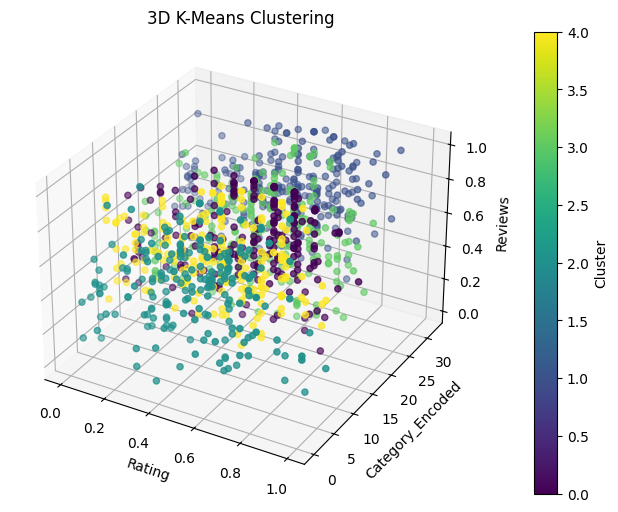

In [93]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
scatter = ax.scatter(
    scaled_ft['Rating'],
    cat_cluster['Category_Encoded'],
    scaled_ft['Reviews'],
    c=cat_cluster['Cluster'],
    cmap='viridis'
)

# Adding labels and title
ax.set_xlabel("Rating")
ax.set_ylabel("Category_Encoded")
ax.set_zlabel("Reviews")
ax.set_title("3D K-Means Clustering")

# Adding colorbar for clusters
cb = fig.colorbar(scatter, ax=ax, pad=0.1)
cb.set_label("Cluster")

plt.show()
